### Segundo Notebook para o curso de Machine Learning da Alura
  - A partir do dataset de "Churn" -> teremos que resolver a situação de desistência/saída de clientes de uma empresa; taxa de evasão de clientes.
  - Atuação através de modelos de ***KNN, Bernoulli Bayes e Decions Trees.***
  - Classificar clientes como possíveis desistentes

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 39)

dados = pd.read_csv("Customer-Churn.csv")
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [2]:
traducao_dic = {'Sim': 1,
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [3]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

#junção dos dados trasformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [4]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

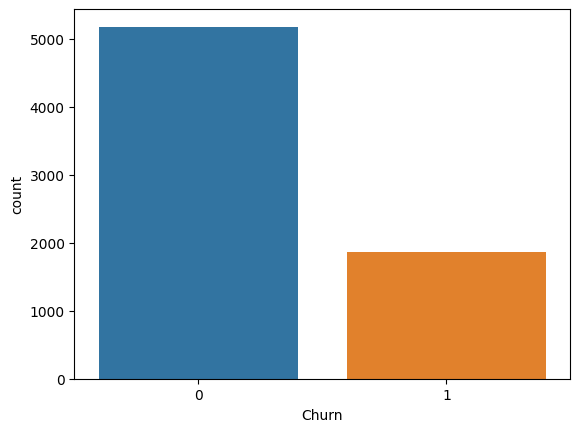

In [5]:
# Balanceando dados:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

In [6]:
from imblearn.over_sampling import SMOTE

X = dados_final.drop('Churn', axis = 1) # X são todas as features, menos Churn
y = dados_final['Churn']

In [7]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [8]:
# Antes de calcular a distância -> deixar valores na mesma escala
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
# Pega os atributos, subtrai a média e divide-se pelo desvio padrão
X_normalizado = norm.fit_transform(X)
X_normalizado
# Retorna os dados normalizados -> em uma escala única

array([[ 1.26542767, -0.52771004, -3.06083934, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ]])

In [9]:
# Verificação de clientes:
X_normalizado[0] # Características normalizadas

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.44617598,
       -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        1.18690873, -0.44617598, -0.77707385,  1.20311799, -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30373042, -0.47912706, -0.4360152 ])

In [11]:
# Função aplicada em conjuntos de dados 2D -> linhas e colunas
# Maria está em um vetor de características -> definindo linhas e colunas
# Transformando o vetor da maria, em um conjunto contido dentro do conjunto X
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns=X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.44617598,
        -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83117367, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76702973, -0.47912706,  2.293498  ]])

In [14]:
# Cálculo de "Distância Euclidiana"
# Utilizando a Maria e o Cliente[0], teremos:
import numpy as np

a = Xmaria_normalizado # Conjunto normalizado da Maria
b = X_normalizado[0] # Cliente 1
# Diferença das características do conjunto
a - b
np.square(a-b) # Elevação ao quadrado da subtração
# Somatório dos resukltados
np.sum(np.square(a-b))
# Tirar a raíza do valor da função
np.sqrt(91.7112036526817)

9.576596663360199

In [23]:
# Para calcular as distância entre os 10 primeiros e Maria
def distancia (dados_clientes, dados_maria, numero_clientes):
  distancias = []
  for i in range (numero_clientes):
    dist1 = dados_maria - dados_clientes[i]
    soma_quadrado = np.sum(np.square(dist1))
    distancias.append(np.sqrt(soma_quadrado))
  return distancias
distancia(X_normalizado, Xmaria_normalizado, 10)

[9.576596663360199,
 9.164687977147782,
 8.497169420877166,
 10.037544220142902,
 7.8028994013625566,
 9.01167938964265,
 8.970041771751976,
 10.634917481179656,
 9.45035230511453,
 7.919985943117673]

### Implementação do modelo de KNN

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Separação das variáveis em treino e teste
# random_state = define um valor que reprodutibilidade do código -> replicar
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado,
                                                        y,
                                                        test_size=0.3,# 30%
                                                        random_state=123)
# Criando o modelo -> a partir do treino
knn = KNeighborsClassifier(metric="euclidean") # Parametriza a métrica
knn.fit(X_treino, y_treino)
prev_knn = knn.predict(X_teste)
prev_knn

array([1, 0, 0, ..., 0, 1, 1])

### Aplicação do teste de Bernoulli para interpretar as probabilidades dos eventos.

In [24]:
# Mediana -> valores centrais dos nossos dados ordenados
np.median(X_treino)
# O resultado -> valor central

-0.4461759755508453

In [34]:
from sklearn.naive_bayes import BernoulliNB
#Criando o modelo
# Como o dataset não possui somente variáveis binárias ->
# "binarize" -> limite para transformar a variável em binária, ou não a partir de uma valor estatístico central
X_treino_binarizado = np.where(X_treino > np.median(X_treino), 1, 0)
bnb = BernoulliNB() # Define que > -0.44 transforma em [1] e abaixo em [0]
bnb.fit(X_treino_binarizado, y_treino)
prev_Bnb = bnb.predict(X_teste)
prev_Bnb
# Retorna as probabilidade de características ocorrerem, de acordo com a ocorrência de y

array([1, 0, 0, ..., 1, 1, 1])

In [37]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="entropy", random_state=42)
dtc.fit(X_treino, y_treino)
dtc.feature_importances_ # Verificar a importância de cada atributo
# Portanto, quanto menor o valor, mais puro é o dado
prev_dtc = dtc.predict(X_teste)
prev_dtc

array([0, 0, 0, ..., 1, 1, 1])

In [38]:
from  sklearn.metrics import confusion_matrix
# Recebe parâmetros (teste [real do modelo], previsão [estimativa])
print(confusion_matrix(y_teste, prev_knn))
print(confusion_matrix(y_teste, prev_Bnb)) # Menor qualidade de estimador entre os modelos
print(confusion_matrix(y_teste, prev_dtc)) # Dificuldade em classificar "Sim" e "Não"

[[1242  327]
 [ 248 1288]]
[[1039  530]
 [ 237 1299]]
[[1250  319]
 [ 275 1261]]


In [43]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_teste, prev_knn) * 100)
print(accuracy_score(y_teste, prev_Bnb) * 100)
print(accuracy_score(y_teste, prev_dtc) * 100)

81.48148148148148
75.29790660225443
80.8695652173913


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score